<a href="https://colab.research.google.com/github/amadords/Projetos-Publicos/blob/master/An%C3%A1lise_de_Dados_(Airbnb_Rio_de_Janeiro).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados (Airbnb - Rio de Janeiro)

---

[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)


<center><img width="90%" src="https://raw.githubusercontent.com/amadords/images/main/airbnb-rio.png"></center>

O [Airbnb](https://www.airbnb.com.br/) é, sem dúvidas, a **maior empresa hoteleira da atualidade**. A empresa faz parte de uma nova cultura onde se torna a maior de um segmento sem sequer ter um bem físico para o consumo dos clientes. 

Me deixe explicar melhor: Embora seja a maior empresa hoteleira, o Airbnb não possui nenhum hotel, assim como a Uber pode ser considerada a maior no segmento de  serviço de transportes para tráfego de pessoas (táxi), porém sem possuir nenhum carro. Esse tipo de empresa tem, na verdade, todo um sistema de **logística** e **planejamento sustentável** que permite benefícios para quem trabalha em seu nome, além de, claro, a própria empresa ter seu lucro.


O Airbnb atua **conectando pessoas** que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, através de uma plataforma que torna a hospedagem alternativa.

E Março de 2019, a empresa atingiu a marca de **500 milhões de hóspedes** através de sua plataforma.

A exemplo de grandes empresas como Uber e Spotify, o Airbnb **disponibiliza dados** de algumas grande cidade ao redor do mundo através do [Inside Airbnb](http://insideairbnb.com/get-the-data.html), onde se pode baixar ou até mesmo utilizar os dados diretamente do site p'ra análises, com fim de desenvolver projetos e soluções de **Data Science** ou **Analytics** puramente.



## Sobre o projeto

Neste *notebook*, iremos analisar os dados referentes à cidade do **Rio de Janeiro**, e ver quais **insights** podem ser extraídos a partir de dados brutos. Embora seja comum na Ciência de Dados fazer sempre uma Regressão ou Classificação ao final do projeto, não iremos chegar a isso, uma vez que o objetivo é apenas analisar os dados. Isso significa também que as partes de limpeza de dados, bem como processamento de dados que podem ser vistos em nosso [github](https://github.com/amadords) ou, mais precisamente, [neste](https://github.com/amadords/Projetos-Publicos/blob/master/Pr%C3%A9_processamentos,_M%C3%A9tricas_e_Pipelines_(Pr%C3%A1tica).ipynb) notebook, também não serão executadas.

**Por que isso?**

P'ra mostrar que o Cientista também deve se apegar à análise. Uma vez que é uma parte vital de um projeto, não se deve passar levianamente, a fim de chegar nas outras fases.

**Importando as bibliotecas necessárias**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## **Análise dos Dados**


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


**Importando os dados e lendo as 5 primeiras linhas**

In [2]:
# carregando os dados
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv")

# lendo os dados
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,2020-04-06,2.11,1,0
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,2020-03-22,1.25,1,69
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,2020-02-15,1.98,3,95
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,2020-03-02,2.37,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,2020-03-15,2.29,1,358


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

*Observação: Este dataset é a versão "resumida" do Airbnb, contendo o nome `listings.csv`. A versão completa com 35847 entradas e 106 variáveis está em `listings.csv.gz`.*

**Tamanho da base de dados e tipo dos dados**

In [3]:
# tamanho das base de dados

print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# tipo de dado de cada coluna
display(df.dtypes)

Entradas:	 35870
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes e cuidado que se tem com eles.

É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas. Se sim, é importante saber o que se fazer com eles. Por isso vamos levantar alguns questionamentos.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes, por isso será retirada mais à frente.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas, será que devem ser removidas? Devem ser substituidos esse valores?
* As variáveis `name` e `host_name` têm aproximadamente 0,1% e 0.01% dos valores nulos, respectivamente, apenas apago essas linhas?

**Ordenando em ordem decrescente as variáveis por seus valores ausentes**

O resultado está em percentual, a exemplo a feature `neighbourhood_group ` está com 100% dos valores ausentes como já foi mencionado antes.


In [4]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100


neighbourhood_group               100.000000
reviews_per_month                  41.165319
last_review                        41.165319
name                                0.161695
host_name                           0.013939
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, serão plotados histogramas.

Lembre que os histogramas mostram a frequência ou a distribuição gráfica dos dados.

 Ao chamar a função **hist()** apenas os dados numéricos serão plotados.

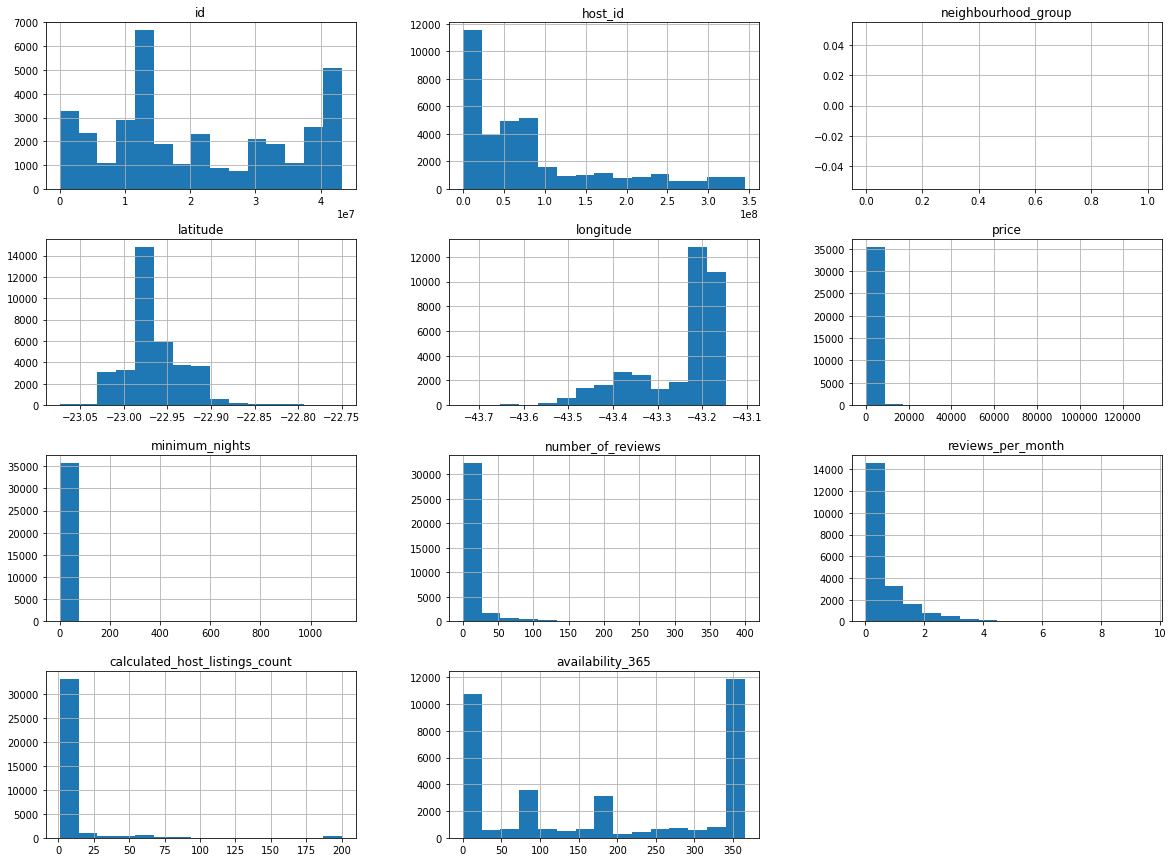

In [5]:
df.hist(bins=15, figsize=(20,15));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição,distorcendo toda a representação gráfica. Veja `price`, por exemplo. Seus valores estão quase todos abaixo de R\$ 2.000,00 (dois mil reais), contudo o gráfico vai até R\$ 12.000,00 (doze mil reais), o que significa que há algum ou alguns poucos dados fora do padrão estão em torno desse valor. Talvez um pouco acima, talvez um pouco abaixo.

Para confirmar o que está sendo dito, há duas maneiras rápidas e simples que auxiliam a detecção de *outliers*:

* Resumo estatístico por meio do método `describe()`.
* Plotar `boxplots` para a variável.

**Resumo estatístico das variáveis numéricas**


In [6]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,35870.000000,35870.000000,35870.000000,21104.000000,35870.000000,35870.000000
mean,753.686367,4.781851,9.822972,0.652248,6.613995,180.371815
std,2229.366334,22.471085,25.827647,0.823388,22.769663,152.510778
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,158.000000,1.000000,0.000000,0.130000,1.000000,0.000000
50%,298.000000,2.000000,1.000000,0.340000,1.000000,178.000000
75%,632.000000,4.000000,6.000000,0.830000,3.000000,363.000000
max,131727.000000,1123.000000,399.000000,9.570000,200.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 632, porém seu valor máximo é 131727, motivo para termos lá no histograma aquele valor anômalo de 12.000 na frequência.

* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

**Boxplot para minimum_nights**

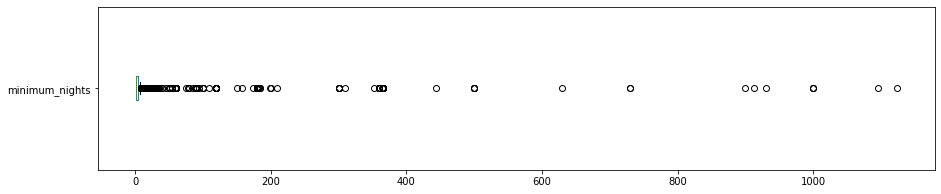

minimum_nights: valores acima de 30:
224 entradas
0.6245%


In [7]:
# boxplot minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

**Boxplot para price**

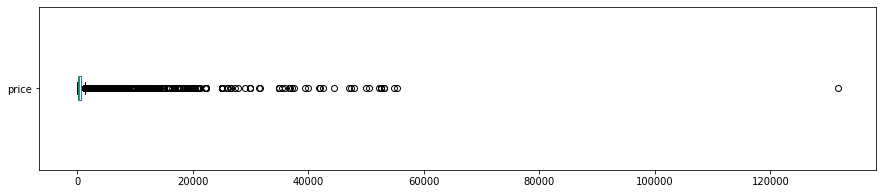


price: valores acima de 1500
3360 entradas
9.3672%


In [8]:
# boxplot para price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))


**Veja a diferença sem esse valores anômalos atrapalhando o gráfico**

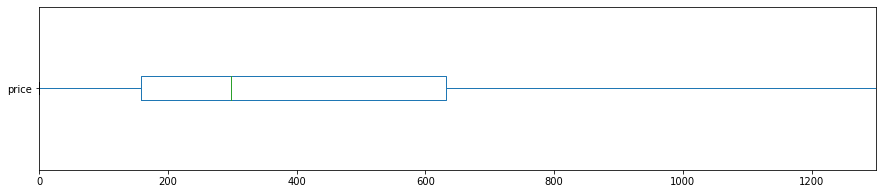

In [9]:
df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

**Histogramas sem *outliers***

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

Veja que isso é o mínimo que pode ser feito nos tratamentos de dados, tanto que nem considerei como uma fase de pré-processamento ou limpeza dos dados. O trabalho com pré-processamento, principalmente quando vão ser entregues a algoritmos levam de 70-80% do tempo do trabalho de um Cientista de Dados.

Um novo DataFrame será criado para manter o original sem alterações.

In [10]:
# removendo os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True) # price
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True) # minimum_nights

# removendo `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

**Plotando o histograma após a "limpeza"**

Note a diferença entre as variáveis antes e depois.

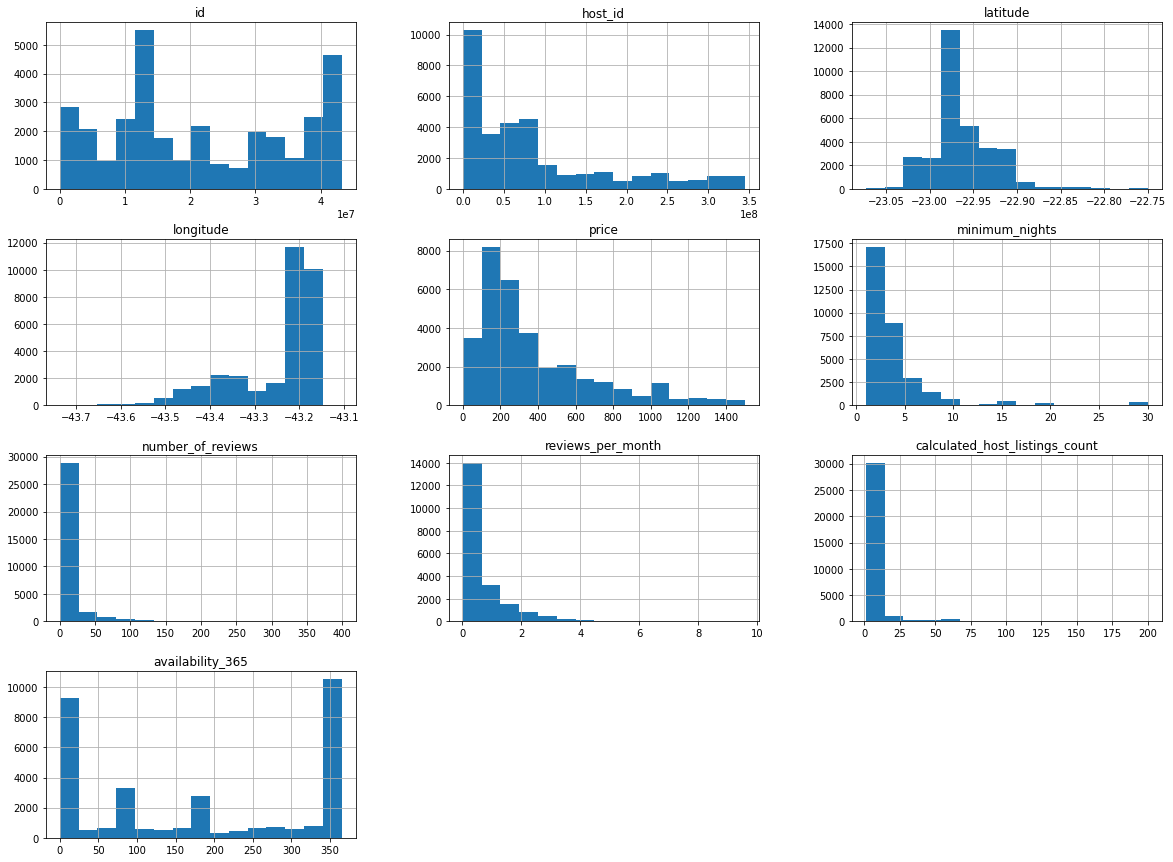

In [11]:
df_clean.hist(bins=15, figsize=(20,15));

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Importante salientar que **correleção não é causa**. Embora seja um indicativo interessante, é importante fazer essa diferenciação. Por exemplo, é comum o preço de um imóvel ser mais caro à medida que se aumenta o tamanho dos cômodos. A correlação é forte nesse caso, mas isso não significa necessariamente que o preço é alto porque o número de cômodos é alto também. 

Essa relação pode ser medida e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação.
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`.

** Criando uma matriz de correlação**


In [12]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.163318,-0.162241,-0.162366,0.047043,-0.015328
minimum_nights,0.163318,1.000000,-0.059857,-0.080109,-0.033148,-0.016418
number_of_reviews,-0.162241,-0.059857,1.000000,0.645518,-0.026347,0.050653
reviews_per_month,-0.162366,-0.080109,0.645518,1.000000,-0.013855,-0.020716
calculated_host_listings_count,0.047043,-0.033148,-0.026347,-0.013855,1.000000,0.073733
availability_365,-0.015328,-0.016418,0.050653,-0.020716,0.073733,1.000000


**Gráfico Heatmap**

Ou seja, *mapa de calor*. Veja que na diagonal princiapl estão os valores onde a correlação é 1.00, ou seja, há 100% de correlação.

Claro, pois estamos fazendo a correlação de uma variável com ela mesmo.

Veja que quase não há correlação entre as variáveis. Apenas `number_of_reviews` e `reviews_per_month` têm alguma correlação, correlação essa, um tanto razoável.

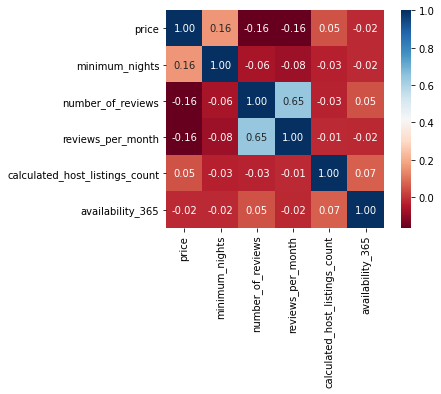

In [13]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. 

Uma vez que pessoas alugam desde a sala de sua casa até uma casa ou apartamento inteiro, há uma variação até considerável dos tipos de locação presentes no site.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

**Quantidade de cada tipo de imóvel disponível**

In [14]:
df_clean.room_type.value_counts()

Entire home/apt    22418
Private room        8969
Shared room          765
Hotel room           160
Name: room_type, dtype: int64

**Porcentagem de cada tipo de imóvel disponível**


In [15]:
df_clean.room_type.value_counts() / df_clean.shape[0]*100

Entire home/apt    69.379797
Private room       27.757489
Shared room         2.367541
Hotel room          0.495172
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do Rio?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()` e é um dos métodos mais utilizados para fazer a **Análise de Dados** ou mesmo **consultas SQL**.

No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

**Comparando `neighbourhood` com `price`**

In [16]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Vaz Lobo                  875.666667
Engenheiro Leal           800.000000
Ricardo de Albuquerque    601.200000
Paciência                 523.555556
Lagoa                     522.097859
Abolição                  483.666667
Leblon                    479.767359
Anchieta                  475.600000
Deodoro                   474.000000
Joá                       472.382979
Name: price, dtype: float64

Acima, vemos que bairros como Vaz Lobo, Engenheiro Leal, Ricado de Albuquerque e Paciência, estão com média de preço superior a de lugares como Leblon, Barra da Tijuca e Lagoa. Isso condiz com o que a realidade deveria apresentar?

Se você não conhecesse o Rio, Leblon, Barra da Tijuca e Lagoa são alguns dos lugares mais nobres da cidade, ao contrário de Vaz Lobo, Engenheiro Albuquerque e Paciência. Aqui entra algum tipo de entendimento de negócio ou dos dados apresentados, pois sem isso, poderia  ser apresentado esses resultados sem qualquer questionamento. 

**Quantidade de imóveis em Vaz Lobo**

In [17]:
# quantidade de imóveis no Vaz Lobo
print('Número de Entradas:', df_clean[df_clean.neighbourhood == "Vaz Lobo"].shape[0])

# visualizando as 3 entradas
df_clean[df_clean.neighbourhood == "Vaz Lobo"]

Número de Entradas: 3


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2908,2768499,Próximo ao Maracanã,14157867,Fernando,Vaz Lobo,-22.85955,-43.32918,Private room,1000,1,0,NaN,NaN,1,0
15776,14221134,"casa colonial 3 quartos, garagem",86402266,Lucia,Vaz Lobo,-22.85583,-43.32441,Entire home/apt,1329,15,0,NaN,NaN,1,365
33803,42012781,Casas flegler,332881900,Igor Flegler De Souza,Vaz Lobo,-22.86070,-43.32446,Private room,298,1,0,NaN,NaN,1,362


**Quantidade de imóveis em Engenheiro Leal**


In [18]:
# quantidade de imóveis no Vaz Lobo
print('Número de Entradas:', df_clean[df_clean.neighbourhood == "Engenheiro Leal"].shape[0])


# visualizando as 2 entradas
df_clean[df_clean.neighbourhood == "Engenheiro Leal"]

Número de Entradas: 2


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22589,26996243,Engenheiro Leal Casa,159787826,Antonio,Engenheiro Leal,-22.87497,-43.32121,Entire home/apt,1499,15,0,NaN,NaN,2,365
34840,42403931,Quarto em Cascadura,336310280,Rodrigo,Engenheiro Leal,-22.87728,-43.32327,Private room,101,1,0,NaN,NaN,1,90


**Quantidade de imóveis em Ricado de Ricardo de Albuquerque**

In [19]:
# quantidade de imóveis em Ricado de Albuquerque
print('Número de Entradas:', df_clean[df_clean.neighbourhood == "Ricardo de Albuquerque"].shape[0])

# visualizando as 5 entradas
df_clean[df_clean.neighbourhood == "Ricardo de Albuquerque"]

Número de Entradas: 5


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3945,3106028,Rent home for World Cup season,14962884,Gilcéa,Ricardo de Albuquerque,-22.83446,-43.38553,Private room,1000,1,0,NaN,NaN,1,365
14220,13927176,Rent for the 2016 Olympics,81890830,Luiz,Ricardo de Albuquerque,-22.83942,-43.40542,Entire home/apt,1063,1,0,NaN,NaN,1,89
15898,14251471,House for Olympics near Complex Deodoro,86752448,Rafael,Ricardo de Albuquerque,-22.83933,-43.39691,Entire home/apt,523,6,0,NaN,NaN,1,0
16244,14382360,PARQUE OLIMPICO DE DEODORO- FAMILIAR,88303678,Olimpia Catarina De,Ricardo de Albuquerque,-22.84187,-43.40335,Private room,298,1,0,NaN,NaN,1,365
34639,42329773,Quitinete independente para casal ou +,330224882,Josue,Ricardo de Albuquerque,-22.83918,-43.39641,Entire home/apt,122,3,0,NaN,NaN,4,180


**Quantidade de imóveis em Paciência**

In [20]:
# quantidade de imóveis em Paciência
print('Número de Entradas:', df_clean[df_clean.neighbourhood == "Paciência"].shape[0])

# visualizando as 9 entradas
df_clean[df_clean.neighbourhood == "Paciência"]

Número de Entradas: 9


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2371,2530079,Comfy Room for 2 people (only $80!),12956129,Vanessa,Paciência,-22.92713,-43.63608,Private room,425,1,0,NaN,NaN,1,365
11913,13192575,Apartamento aconchegante na zona sul,31376590,Reiner,Paciência,-22.92360,-43.62735,Entire home/apt,96,1,0,NaN,NaN,1,0
12597,13485696,Lar do Aconchego: sorrio porque sou Rio!!!,77238249,Danny,Paciência,-22.91813,-43.63329,Entire home/apt,479,1,0,NaN,NaN,1,365
15742,14215728,"RJ/ 2 quartos , cabem até dois casais.",86333217,Marlon,Paciência,-22.91853,-43.64091,Entire home/apt,399,1,0,NaN,NaN,2,89
15950,14264909,Rj/ Apartamento + tv a cabo + wifi,86333217,Marlon,Paciência,-22.91628,-43.63672,Entire home/apt,399,2,0,NaN,NaN,2,365
21143,22790931,"Praia, lazer e diversão com conforto.",157801922,Christiane,Paciência,-22.89247,-43.63677,Private room,1000,4,0,NaN,NaN,1,365
23682,29983771,Casa da Família,218943127,Fernanda,Paciência,-22.93083,-43.63605,Entire home/apt,202,5,0,NaN,NaN,1,90
27440,35530985,Espaçosa casa com 2 quartos.,267314910,Marcos,Paciência,-22.92320,-43.62381,Entire home/apt,213,30,0,NaN,NaN,1,365
35715,43204482,Casa Luxuosa,344002353,José Wagner,Paciência,-22.87399,-43.64529,Entire home/apt,1499,1,0,NaN,NaN,1,365


**Veja**

Juntando os quatro bairros temos um total de 19 (dezenove) entradas em um total de 32.312 (trinta e dois mil trezentos e doze), como pode ser visto abaixo na base de dados.

As poucas entradas mostram, em uma análise superficial, que há valores que elevam a média p'ra muito além do que se espera desses lugares. A exemplo do `ID 35715`, que é uma casa em *Paciência* com custo de R\$ 1.490,00 (mil quatrocentos e noventas reais).

In [21]:
df_clean.shape

(32312, 15)

**Para finalizar**

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto em um gráfico. Considerando `x=longitude` e `y=latitude`.

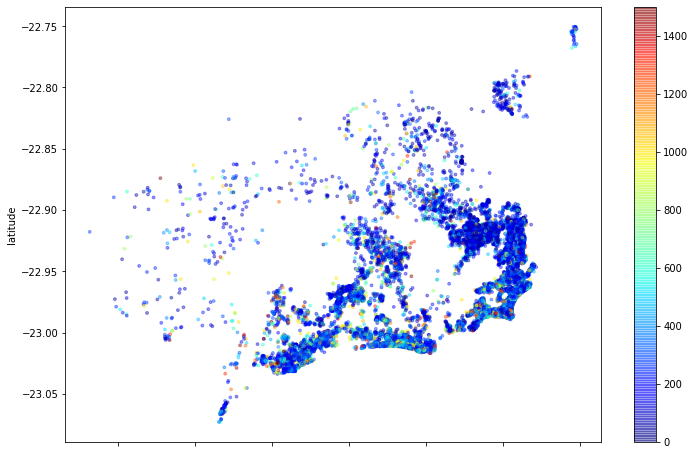

In [22]:
# plotando os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## **Conclusões**

A análise feita foi superficial, contudo já deu para se perceber que existem outliers em algumas das variáveis.

Além disso, também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos, caso não seja feita uma análise mais precisa e profunda.

*Observação: O dataset é uma versão resumida (ideal apenas para uma abordagem inicial). Em uma próxima análise exploratória, é interessante utilizar o conjunto de dados completos, com 106 atributos disponíveis.*

# Obrigado!

Obrigado por ter disponibilizado um pouco do seu tempo e atenção aqui. Espero que, de alguma forma, tenha sido útil para seu crescimento. Se houver qualquer dúvida ou sugestão, não hesite em entrar em contato no [LinkedIn](https://www.linkedin.com/in/daniel-sousa-amador) e verificar meus outros projetos no [GitHub](https://github.com/amadords).

[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)



<center><img width="90%" src="https://raw.githubusercontent.com/danielamador12/Portfolio/master/github.png"></center>